# Betting on Esports
## EDA
### Jonathan Pena
### Capstone Notebook Part 1
# Introduction

As Esports become more popular, many industries surrounding it have also grown in popularity. One of them is the sports betting market which is expected to reach 205 billion dollars by 2027. As internet access and investment increase, video games are becoming very popular, increasing live streaming of games and supporting infrastructure for tournaments. As a result of the lockdowns, gamblers also turned from traditional betting on live sports to eSports during the pandemic. 

Taking advantage of this industry would be a fantastic opportunity, and that is what this project seeks to achieve. This project aims to build a machine learning model that predicts eSport matches results and compares it to the odds provided by different betting websites, so that bets can be placed in an optimal way.

Here are some of the most popular games where you can place your bets:

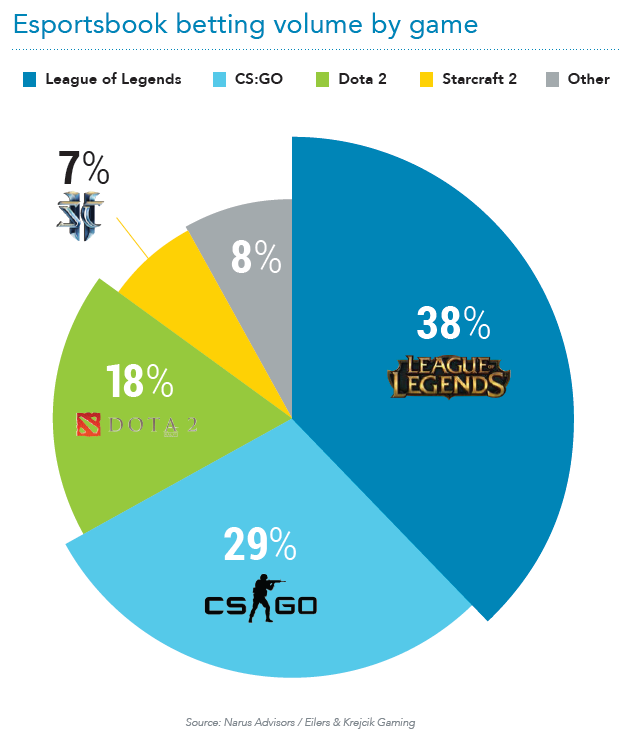

In this project we will analyze League of Legends, one of the games where people bet the most. This analysis was conducted using data collected by Tim Sevenhuysen from the Oracle Elixir website. It contains match data from different League of Legends leagues for 2021. It is updated daily in CSV format and is available for download.

EDA will be performed in this notebook in order to clean it and understand the information that it contains so that our model can be built later.

## Data Loading

First, we will load the dataset and take a look at the information it contains.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore futurewarnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data into a dataframe.
lol_df = pd.read_csv('data/2021_LoL_esports_match_data_from_OraclesElixir_20210922.csv')

In [3]:
# check some rows from the dataset
lol_df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1,10.25,1,Blue,top,Khan,DWG KIA,Mordekaiser,Aatrox,Kai'Sa,Pantheon,Aphelios,Lucian,1782,1,7,1,3,23,4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.7744,0.9091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,20435.0,688.0471,0.276268,717.7441,933.9731,13.0,0.4377,5.0,0.1684,7.0,25.0,0.8418,12065,8154.0,274.5455,0.196019,10875.0,NaN,209.0,193.0,16.0,8.0,5.0,7.0370,3421.0,5043.0,73.0,2985.0,4493.0,72.0,436.0,550.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5407.0,7536.0,114.0,4659.0,7592.0,118.0,748.0,-56.0,-4.0,2.0,0.0,1.0,0.0,1.0,1.0
1,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1,10.25,2,Blue,jng,Canyon,DWG KIA,Graves,Aatrox,Kai'Sa,Pantheon,Aphelios,Lucian,1782,1,7,1,5,23,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7744,0.9091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,13944.0,469.4949,0.188514,559.0909,400.5387,10.0,0.3367,14.0,0.4714,10.0,46.0,1.5488,13944,10033.0,337.8114,0.241189,13850.0,NaN,259.0,41.0,218.0,110.0,43.0,8.7205,3497.0,4314.0,87.0,3055.0,3059.0,62.0,442.0,1255.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,6974.0,8232.0,146.0,4854.0,4827.0,84.0,2120.0,3405.0,62.0,3.0,2.0,0.0,2.0,0.0,3.0
2,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1,10.25,3,Blue,mid,ShowMaker,DWG KIA,Zoe,Aatrox,Kai'Sa,Pantheon,Aphelios,Lucian,1782,1,5,0,8,23,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7744,0.9091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,16039.0,540.0337,0.216837,285.4545,282.6936,11.0,0.3704,8.0,0.2694,4.0,59.0,1.9865,14274,10363.0,348.9226,0.249122,12700.0,NaN,299.0,250.0,49.0,17.0,24.0,10.0673,3784.0,5171.0,114.0,3301.0,4822.0,91.0,483.0,349.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,6591.0,7827.0,158.0,5013.0,7473.0,143.0,1578.0,354.0,15.0,2.0,3.0,0.0,0.0,0.0,0.0
3,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1,10.25,4,Blue,bot,Ghost,DWG KIA,Miss Fortune,Aatrox,Kai'Sa,Pantheon,Aphelios,Lucian,1782,1,3,2,11,23,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7744,0.9091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,17202.0,579.1919,0.232560,339.6296,291.8855,15.0,0.5051,5.0,0.1684,7.0,34.0,1.1448,13097,9186.0,309.2929,0.220828,11925.0,NaN,292.0,265.0,27.0,17.0,4.0,9.8316,3540.0,3354.0,94.0,3020.0,3053.0,75.0,520.0,301.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,5202.0,5053.0,1

In [4]:
# dataset shape
lol_df.shape

(131208, 119)

## Cleaning the Dataset

There are 131.208 rows and 119 columns in the dataset. 10934 LoL matches from 2021 are represented by this data. Each game has a lot of features and statistics, and the information for each player is also provided. Before we dig into the information each column contains, let's clean it up a bit and remove those columns we won't be using in our analysis.

We begin by filtering out the information we need. Because patch 11.0 was the official patch for the 2021 season, we will analyze only games played in patch 11.0 or higher. Due to the constant development of League of Legends and some changes introduced every year for the game to be more dynamic, there is a possibility that some season 11 features will not apply to season 10 patches.

### Filtering Patch and Team Information

In [5]:
# number of data points for each patch
lol_df['patch'].value_counts()

11.15    13668
11.02    13248
11.13    12972
11.03    12912
11.12    12564
11.01    11736
11.06    10536
11.14     9948
11.04     9504
11.05     8412
11.11     7572
11.16     2484
11.09     2016
11.10     1956
11.07     1272
11.08      324
11.17       48
10.25       36
Name: patch, dtype: int64

In [6]:
# Removing games from patch 10.25
lol_cleaned = lol_df[lol_df['patch'] > 10.30]
lol_cleaned['patch'].value_counts()

11.15    13668
11.02    13248
11.13    12972
11.03    12912
11.12    12564
11.01    11736
11.06    10536
11.14     9948
11.04     9504
11.05     8412
11.11     7572
11.16     2484
11.09     2016
11.10     1956
11.07     1272
11.08      324
11.17       48
Name: patch, dtype: int64

The next step is to filter only the team information for each match. Each team consists of five players. In the `position` column, we have information about each player in a particular game, but we can also find a `team` item that sums up the information about the team.

In [7]:
# Filtering information about teams
lol_cleaned = lol_cleaned[lol_cleaned['position'] == 'team']
lol_cleaned['position'].value_counts()

team    21862
Name: position, dtype: int64

In [8]:
# dataset shape after filter information
lol_cleaned.shape

(21862, 119)

### Missing Values

Having filtered the information and kept the team information for season 11, we now have 21862 rows and 119 columns. Next, we will address the values that are missing from each column.

In [9]:
# missing information percentage for each column
lol_cleaned.isna().sum()/lol_df.shape[0]*100

gameid                       0.006097
datacompleteness             0.000000
url                          0.000000
league                       0.000000
year                         0.000000
split                        5.251204
playoffs                     0.000000
date                         0.000000
game                         0.000000
patch                        0.000000
playerid                     0.000000
side                         0.000000
position                     0.000000
player                      16.662094
team                         0.000000
champion                    16.662094
ban1                         0.044205
ban2                         0.030486
ban3                         0.067069
ban4                         0.047253
ban5                         0.080026
gamelength                   0.000000
result                       0.000000
kills                        0.000000
deaths                       0.000000
assists                      0.000000
teamkills   

A high number of columns lack values, while others fail to provide useful information for building our model. We need to identify those columns and remove them.

Columns to remove:

- Columns containing no meaningful information needed to build our model. The `split` column, for example, contains the time of year when the match occurred, or the `player` column contains the name of the player, but we omit that information. 
- Columns that contain the same information, for example `teamkills` and `kills`.
- Columns with a high number of missing values and cannot be imputed, such as `damageshare` or `turretplate`.
- Columns that show stats at different points in a match. We will only consider the stats at the end of the game. Columns such as `killsat10` and `golddiffat15`.

In [10]:
# drop columns
lol_cleaned = \
lol_cleaned.drop(columns=['datacompleteness', 'url', 'year', 'split', 'playoffs', 'patch', 'playerid', 'position', 'player',
                          'champion', 'ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'doublekills', 'triplekills', 'quadrakills',
                          'pentakills', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim', 'firstdragon', 'opp_dragons',
                          'opp_elementaldrakes', 'dragons (type unknown)', 'opp_elders', 'firstherald', 'opp_heralds', 
                          'opp_barons', 'opp_towers', 'turretplates', 'opp_turretplates', 'opp_inhibitors', 'damagetochampions',
                          'damageshare', 'damagetakenperminute', 'damagemitigatedperminute', 'monsterkills',
                          'monsterkillsownjungle', 'monsterkillsenemyjungle', 'goldat10', 'xpat10', 'csat10', 'opp_goldat10',
                          'opp_xpat10', 'opp_csat10',  'golddiffat10', 'xpdiffat10', 'csdiffat10', 'killsat10', 'assistsat10',
                          'deathsat10', 'opp_killsat10', 'opp_assistsat10', 'opp_deathsat10', 'goldat15', 'xpat15', 'csat15',
                          'opp_goldat15', 'opp_xpat15', 'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
                          'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15','earnedgoldshare',
                          'total cs', 'elementaldrakes', 'infernals','mountains', 'clouds', 'oceans', 'firstbaron',
                          'elders', 'firstmidtower', 'firsttothreetowers', 'visionscore', 'vspm', 'heralds', 'firsttower', 
                          'league', 'teamkills', 'teamdeaths', 'ckpm', 'gspd', 'game'])

In [11]:
# missing information percentage for each column
lol_cleaned.isna().sum()/lol_df.shape[0]*100

gameid                0.006097
date                  0.000000
side                  0.000000
team                  0.000000
gamelength            0.000000
result                0.000000
kills                 0.000000
deaths                0.000000
assists               0.000000
firstblood            0.006097
team kpm              0.000000
dragons               0.000000
barons                0.000000
towers                0.000000
inhibitors            0.042680
dpm                   0.006097
wardsplaced           0.006097
wpm                   0.006097
wardskilled           0.006097
wcpm                  0.006097
controlwardsbought    0.006097
totalgold             0.000000
earnedgold            0.006097
earned gpm            0.006097
goldspent             0.013719
minionkills           0.071642
cspm                  0.065545
dtype: float64

We have a few missing values after dropping the columns that we aren't interested in. Because the missing data points are historical, I consider there is not an optimal way to impute them, since I could introduce some bias, and because they are very few, we will remove all of the missing values.

In [12]:
# dataset shape after dropping columns
lol_cleaned.shape

(21862, 27)

In [13]:
# drop all data points with missing values
lol_cleaned.dropna(inplace=True)

# dataset shape after dropping all missing values
lol_cleaned.shape

(21712, 27)

In [14]:
# missing information percentage for each column
lol_cleaned.isna().sum()/lol_df.shape[0]*100

gameid                0.0
date                  0.0
side                  0.0
team                  0.0
gamelength            0.0
result                0.0
kills                 0.0
deaths                0.0
assists               0.0
firstblood            0.0
team kpm              0.0
dragons               0.0
barons                0.0
towers                0.0
inhibitors            0.0
dpm                   0.0
wardsplaced           0.0
wpm                   0.0
wardskilled           0.0
wcpm                  0.0
controlwardsbought    0.0
totalgold             0.0
earnedgold            0.0
earned gpm            0.0
goldspent             0.0
minionkills           0.0
cspm                  0.0
dtype: float64

Since there are no missing values in our dataset, we can proceed to the next step: checking duplicate data points and verifying the data types of each column.

### Duplicate Values and Data Types

The first step is to identify the duplicate data points.

In [15]:
# show the duplicates in our dataset
lol_cleaned[lol_cleaned.duplicated(keep=False)]

,gameid,date,side,team,gamelength,result,kills,deaths,assists,firstblood,team kpm,dragons,barons,towers,inhibitors,dpm,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,totalgold,earnedgold,earned gpm,goldspent,minionkills,cspm
130936,ESPORTSTMNT04/1880348,2021-09-09 16:18:17,Blue,Fnatic Rising,1389,1,20,5,62,0.0,0.8639,1.0,1.0,9.0,1.0,2575.3780,75.0,3.2397,20.0,0.8639,28.0,49941,34395.0,1485.7451,44750.0,654.0,34.9460
130937,ESPORTSTMNT04/1880348,2021-09-09 16:18:17,Blue,Fnatic Rising,1389,1,20,5,62,0.0,0.8639,1.0,1.0,9.0,1.0,2575.3780,75.0,3.2397,20.0,0.8639,28.0,49941,34395.0,1485.7451,44750.0,654.0,34.9460
130938,ESPORTSTMNT04/1880348,2021-09-09 16:18:17,Blue,Fnatic Rising,1389,1,20,5,62,0.0,0.8639,1.0,1.0,9.0,1.0,2575.3780,75.0,3.2397,20.0,0.8639,28.0,49941,34395.0,1485.7451,44750.0,654.0,34.9460
130939,ESPORTSTMNT04/1880348,2021-09-09 16:18:17,Blue,Fnatic Rising,1389,1,20,5,62,0.0,0.8639,1.0,1.0,9.0,1.0,2575.3780,75.0,3.2397,20.0,0.8639,28.0,49941,34395.0,1485.7451,44750.0,654.0,34.9460
130940,ESPORTSTMNT04/1880348,2021-09-09 16:18:17,Blue,Fnatic Rising,1389,1,20,5,62,0.0,0.8639,1.0,1.0,9.0,1.0,2575.3780,75.0,3.2397,20.0,0.8639,28.0,49941,34395.0,1485.7451,44750.0,654.0,34.9460
130941,ESPORTSTMNT04/1880348,2021-09-09 16:18:17,Blue,Fnatic Rising,1389,1,20,5,62,0.0,0.8639,1.0,1.0,9.0,1.0,2575.3780,75.0,3.2397,20.0,0.8639,28.0,49941,34395.0,1485.7451,44750.0,654.0,34.9460
130942,ESPORTSTMNT04/1880348,2021-09-09 16:18:17,Blue,Fnatic Rising,1389,1,20,5,62,0.0,0.8639,1.0,1.0,9.0,1.0,2575.3780,75.0,3.2397,20.0,0.8639,28.0,49941,34395.0,1485.7451,44750.0,654.0,34.9460
130943,ESPORTSTMNT04/1880348,2021-09-09 16:18:17,Blue,Fnatic Rising,1389,1,20,5,62,0.0,0.8639,1.0,1.0,9.0,1.0,2575.3780,75.0,3.2397,20.0,0.8639,28.0,49941,34395.0,1485.7451,44750.0,654.0,34.9460
130944,ESPORTSTMNT04/1880348,2021-09-09 16:18:17,Blue,Fnatic Rising,1389,1,20,5,62,0.0,0.8639,1.0,1.0,9.0,1.0,2575.3780,75.0,3.2397,20.0,0.8639,28.0,49941,34395.0,1485.7451,44750.0,654.0,34.9460
130945,ESPORTSTMNT04/1880348,2021-09-09 16:18:17,Blue,Fnatic Rising,1389,1,20,5,62,0.0,0.8639,1.0,1.0,9.0,1.0,2575.3780,75.0,3.2397,20.0,0.8639,28.0,49941,34395.0,1485.7451,44750.0,654.0,34.9460


As we can see from above, those are duplicate data points. There should be just two data points per game id, one for the red team and one for the blue team. The next step is to remove duplicate entries.

In [16]:
# dropping duplicate rows
lol_cleaned.drop_duplicates(inplace=True)

In [17]:
# dataset shape after dropping duplicates
lol_cleaned.shape

(21652, 27)

We now have 21652 rows and 28 columns after removing the missing values and duplicates. It corresponds to 10826 matches. After cleaning, 108 matches were removed from the original 10934 matches. Less than 1% of the total matches were dropped.

We will check now the data types of the remaining features:

In [18]:
# check types of our columns
lol_cleaned.dtypes

gameid                 object
date                   object
side                   object
team                   object
gamelength              int64
result                  int64
kills                   int64
deaths                  int64
assists                 int64
firstblood            float64
team kpm              float64
dragons               float64
barons                float64
towers                float64
inhibitors            float64
dpm                   float64
wardsplaced           float64
wpm                   float64
wardskilled           float64
wcpm                  float64
controlwardsbought    float64
totalgold               int64
earnedgold            float64
earned gpm            float64
goldspent             float64
minionkills           float64
cspm                  float64
dtype: object

We would only change one type for our convenience. The column date will be converted from object to datetime.

In [19]:
# Convert 'Date' column to datetime type.
lol_cleaned['date'] = pd.to_datetime(lol_cleaned['date'])

# check types of our columns
lol_cleaned.dtypes

gameid                        object
date                  datetime64[ns]
side                          object
team                          object
gamelength                     int64
result                         int64
kills                          int64
deaths                         int64
assists                        int64
firstblood                   float64
team kpm                     float64
dragons                      float64
barons                       float64
towers                       float64
inhibitors                   float64
dpm                          float64
wardsplaced                  float64
wpm                          float64
wardskilled                  float64
wcpm                         float64
controlwardsbought           float64
totalgold                      int64
earnedgold                   float64
earned gpm                   float64
goldspent                    float64
minionkills                  float64
cspm                         float64
d

We have filtered the data relevant to our model and dealt with the missing values and duplicates. Take a look at the following data dictionary to see what each column represents.

### Data Dictionary

- `gameid`: A unique identification number for each match.
- `date`: Date when the match was played.
- `game`: Number of the round for a match.
- `side`: Side of the map for each team, only blue and red options.
- `team`: Name of the team.
- `gamelength`: Total duration of a match in seconds.
- `result`: Outcome of a game for each team, 1 means a win 0 a lost.
- `kills`: Number of kills made by the team.
- `deaths`: Number of deaths of the team.
- `assist`: Number of assists made by the team.
- `firstblood`: Set to 1 for the team that made the first kill.
- `team kpm`: Kills per minute.
- `dragons`: Number of dragons taken by each team.
- `barons`: Number of barons taken by each team.
- `towers`: Number of towers taken by each team.
- `inhibitors`: Number of inhibitors taken by each team.
- `dpm`: Damage per minute.
- `wardsplaced`: Number of wards placed through the game.
- `wpm`: Wards placed per minute.
- `wardskilled`: Number of wards destroyed.
- `wcpm`: Wards cleared per minute.
- `controlwardsbought`: Number of control wards bought by the team.
- `totalgold`: Total gold of each team.
- `earnedgold`: Earned gold of each team.
- `earned gpm`: Earned fold per minute.
- `gold spent`: Gold spent by each team.
- `minionkills`: Number of minions kills through the game.
- `cspm`: Average monsters + minions killed per minute.

The column that indicates whether a team won the game is our target from the above features. The majority of our columns are numerical, so we will look at the various summary statistics for the dataset.

In [20]:
# statistics summary 
lol_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gamelength,21652.0,1884.637724,332.770035,911.0000,1655.000000,1853.00000,2079.000000,4643.0000
result,21652.0,0.499954,0.500012,0.0000,0.000000,0.00000,1.000000,1.0000
kills,21652.0,14.489562,7.549723,0.0000,8.000000,14.00000,20.000000,53.0000
deaths,21652.0,14.519860,7.549551,0.0000,8.000000,14.00000,20.000000,53.0000
assists,21652.0,32.627471,18.127901,0.0000,17.000000,32.00000,46.000000,110.0000
firstblood,21652.0,0.499861,0.500012,0.0000,0.000000,0.00000,1.000000,1.0000
team kpm,21652.0,0.468755,0.260839,0.0000,0.267300,0.43900,0.627925,2.2710
dragons,21652.0,2.255034,1.380494,0.0000,1.000000,2.00000,3.000000,7.0000
barons,21652.0,0.665158,0.716995,0.0000,0.000000,1.00000,1.000000,4.0000
towers,21652.0,5.838075,3.624609,0.0000,2.000000,7.00000,9.000000,11.0000


From the above summary, we can draw some interesting conclusions:
It is possible to see the differences in performance between pro and normal teams in a match. In the dataset, the average game length is 31 minutes, and the average kills are 14. These values are much lower than those we find in a normal match. Therefore, they are objective-driven, looking to win the game efficiently and as soon as possible.
There are two columns that have the same values: `kills` and `deaths`. This is because the kills of one team are the deaths of the other. As a result, when we combine the information of each team in the same row, we will remove the `deaths` column.

After the dataset has been cleaned and formatted correctly, it is ready for EDA.

## Exploratory Data Ananlysis

Let's divide the dataset according to the map side and assess the distribution for each column. Our purpose is to evaluate the influence that each side of the map has on the outcome of the game.

In [21]:
# blue side dataframe
blue_df = lol_cleaned[lol_cleaned['side']=='Blue'].set_index('gameid')

# red side dataframe
red_df = lol_cleaned[lol_cleaned['side']=='Red'].set_index('gameid')

print(f'Blue side dataframe shape: {blue_df.shape}')
print(f'Red side dataframe shape: {blue_df.shape}')

Blue side dataframe shape: (10826, 26)
Red side dataframe shape: (10826, 26)


The `gameid` column is used as an index because it is a unique identifier for each match. Now, we have two datasets, each with 10826 rows representing the performance of the teams based on the map side. Let's examine the distribution of each column.

We will create a function that plots a histogram for each column in a given dataset:

In [22]:
# define a funtion to plot the distribution of each column in a dataframe
def plot_distributions(df, columns, n_rows, n_cols, c):
    '''
    Function that plot histogram for columns in a given dataset.
    
    Input:
    - df: The dataframe
    - columns: dataframe columns to plot
    - n_rows: number of rows to plot
    - n_cols: number of columns to plot
    - c: plot color
    
    Output:
    A histogram for each column.
    
    '''
    fig=plt.figure(figsize=(20,30))
    for i, column in enumerate(columns):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[column].hist(bins=20,ax=ax, color = c)
        ax.set_title(column +" Distribution")
        
        # Adding median and mean lines
        if df[column].dtype in ['float', 'int64']:
            plt.axvline(df[column].mean(), c='green', label='Mean')
            plt.axvline(df[column].median(), c='gold', label='Median')
            plt.legend()
        plt.tight_layout()
        sns.despine()
    
    plt.show()

Now that we have created a plot_distribution function, we will pass the red_df and blue_df to plot the histogram for each column:

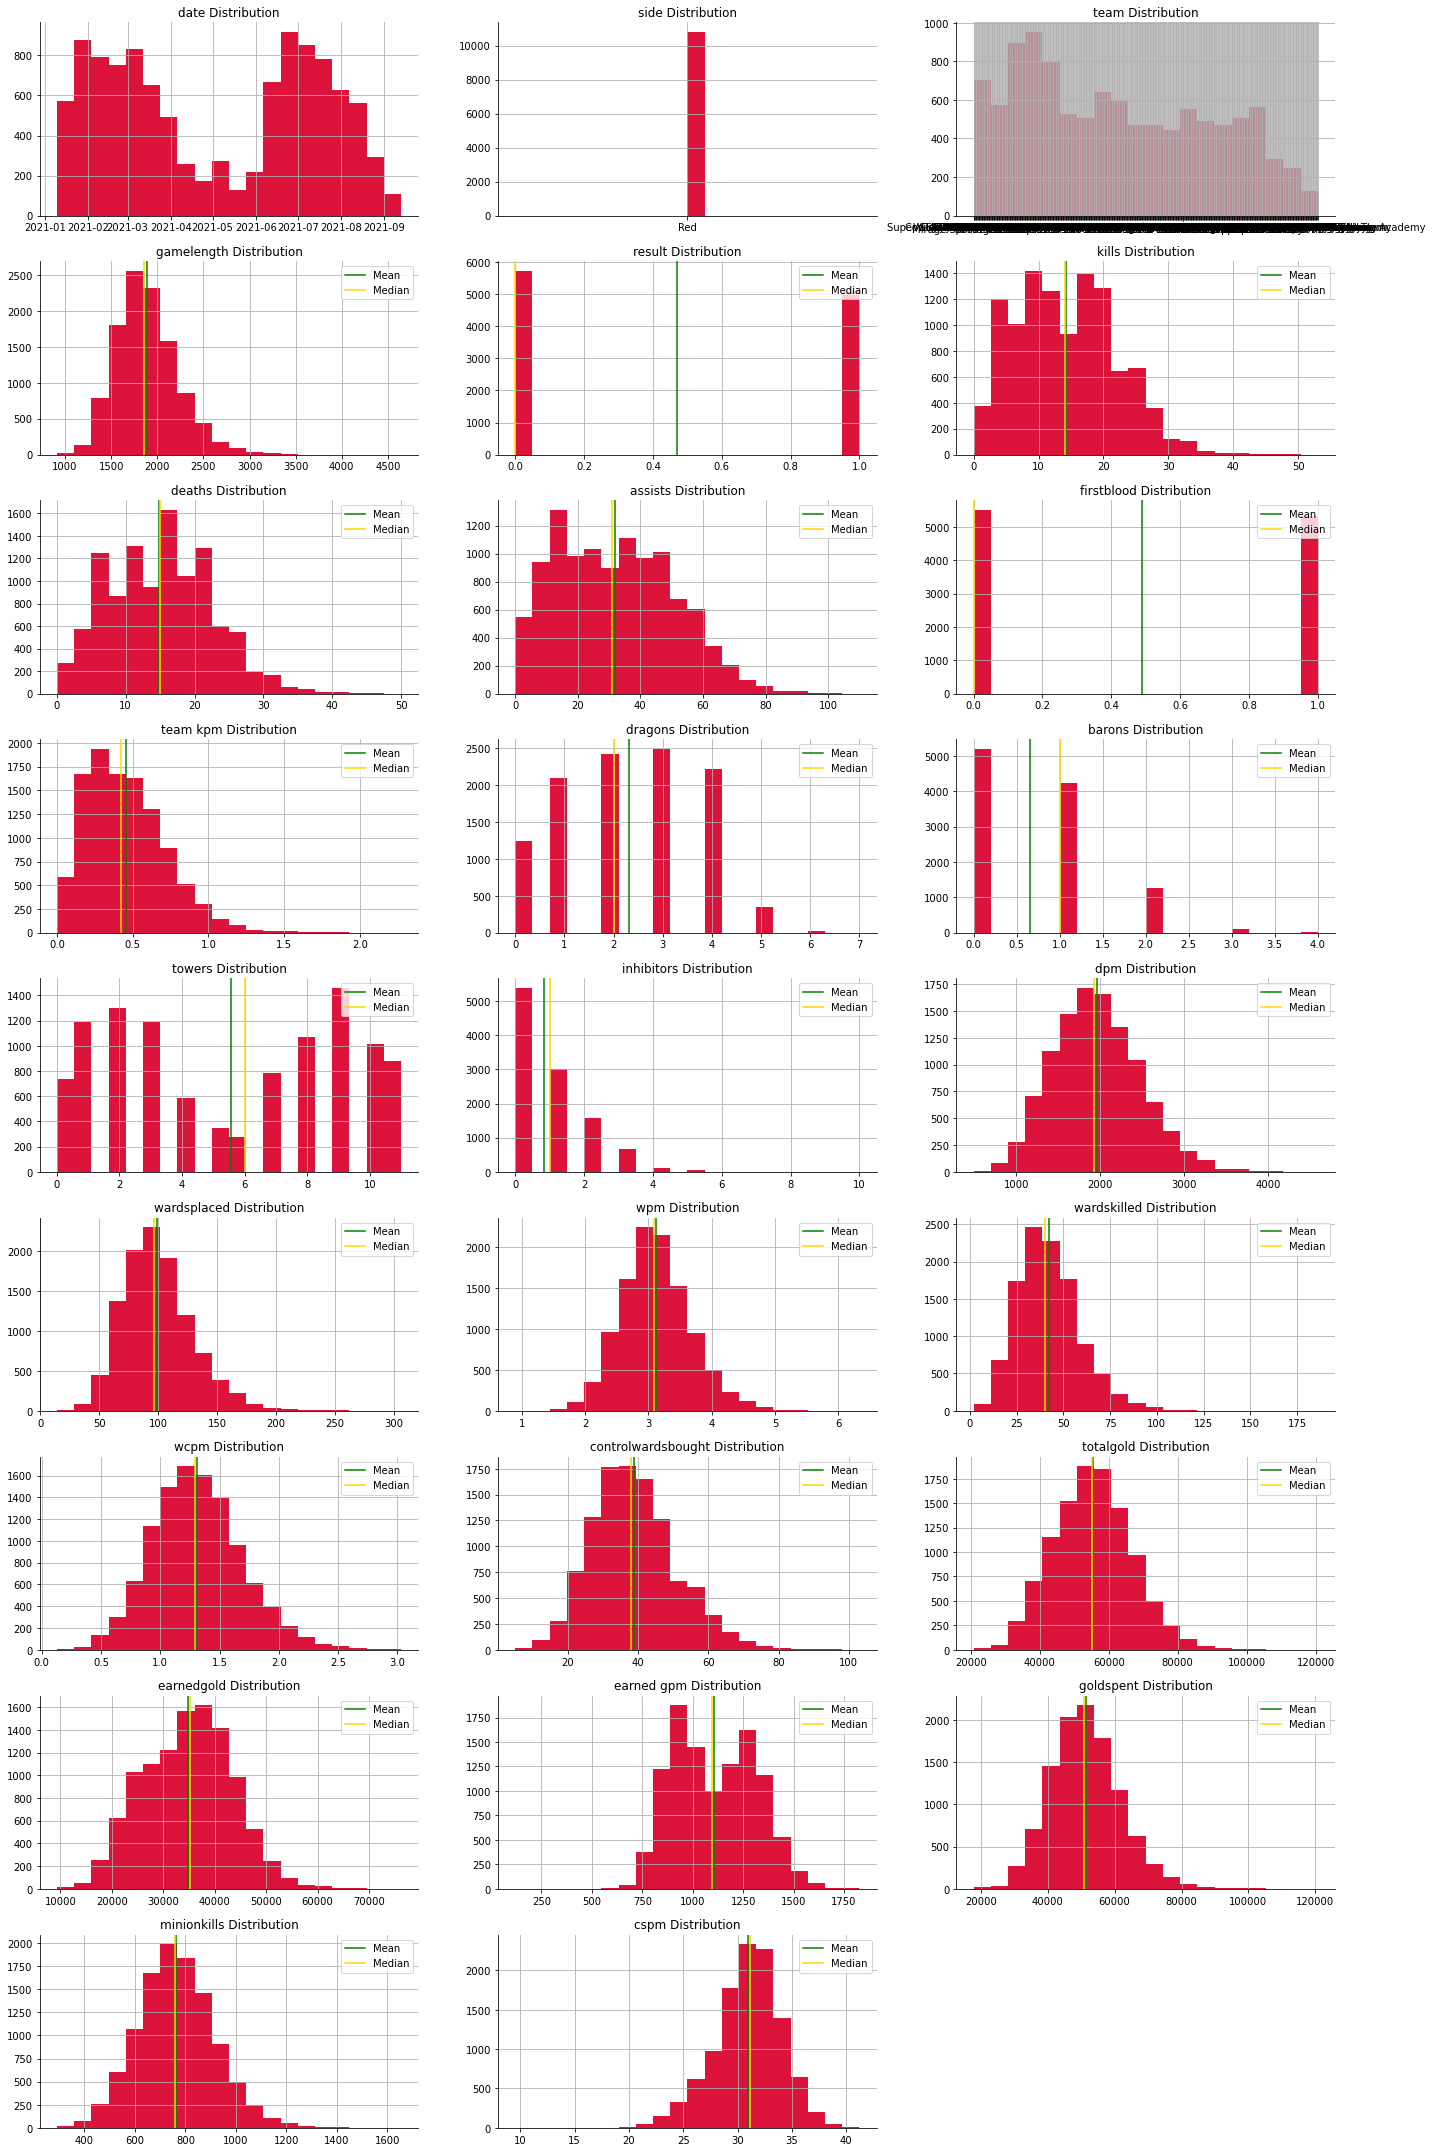

In [23]:
# plot distribution of each column for red side
plot_distributions(red_df, red_df.columns, 9,3, 'crimson')

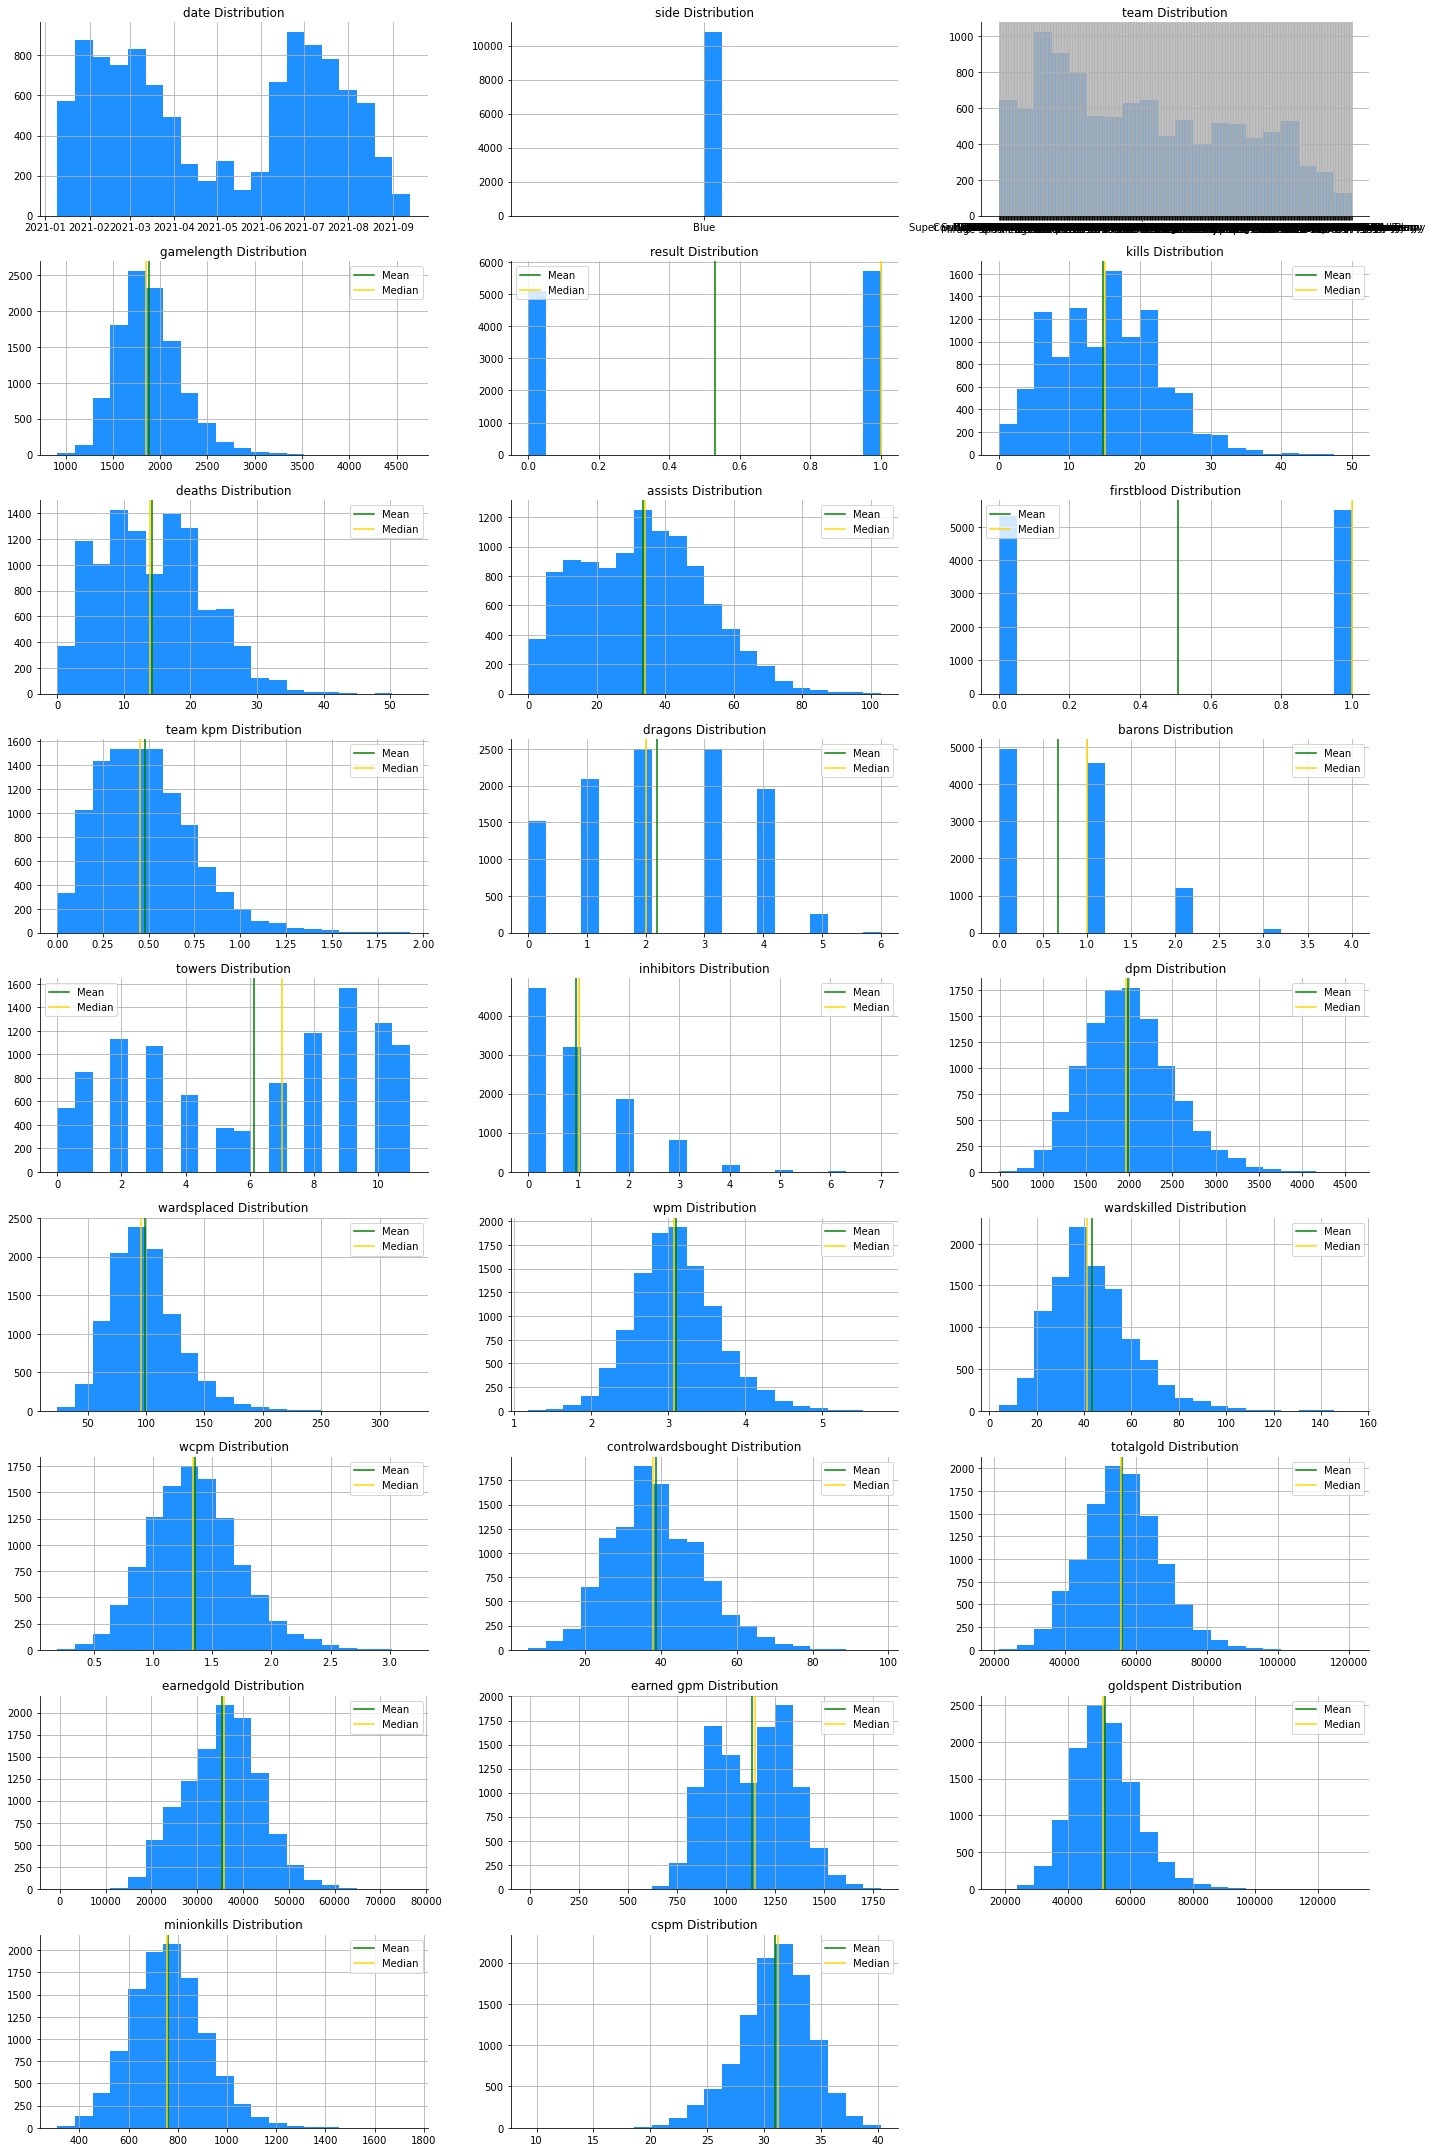

In [24]:
# plot distribution of each column for blue side
plot_distributions(blue_df, blue_df.columns, 9,3, 'dodgerblue')

Both sides have similar distributions. Here are a few highlights:
- The following columns have a distribution very close to that of a normal distribution: `gamelength`, `dmp`, `wpm`, `wcpm`, `controlwardsbought`, `total gold`, `minionkills`.
- There are a few others that are skewed to the left or right: `team kpm`, `cspm`, `wardskilled`.
- In some columns, the distribution is bimodal. This could be because there are two distributions, the distribution from the winning team and the distribution from the losing team. Some of these columns are `towers`, `earned gpm`.
- In the `date` column, we can see that the number of games decreased in the middle of the year. During those times, many major tournaments take place with fewer teams.
- From the distribution of the `result` column on both sides, we can see that the blue team has a slightly higher probability of winning in 2021. Let's check the winning odds for each side.

For each side of the map, we will plot the `result` distribution and evaluate the winning probability.

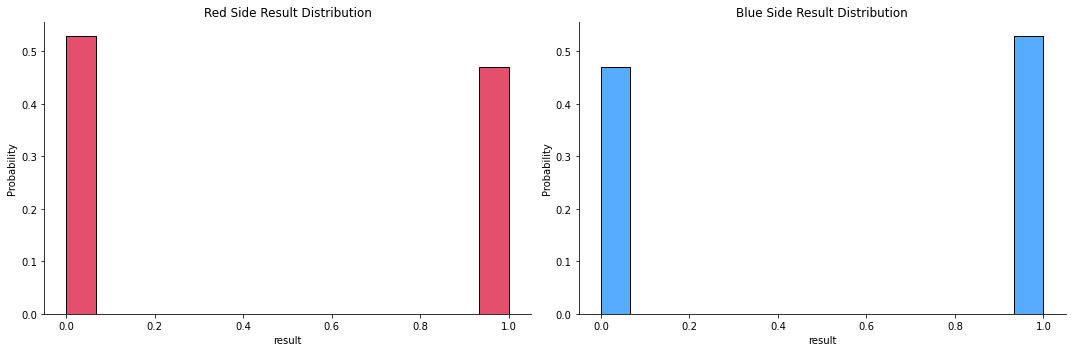

In [25]:
# subplot 1 row x 2 columns
plt.subplots(1,2, figsize=(15,5))

# first subplot
plt.subplot(1,2,1)
sns.histplot(data=red_df, x=red_df['result'], color='crimson', stat='probability')
plt.title('Red Side Result Distribution')

# second subplot
plt.subplot(1,2,2)
sns.histplot(data=blue_df, x=blue_df['result'], color='dodgerblue', stat='probability')
plt.title('Blue Side Result Distribution')

plt.tight_layout()
sns.despine()
plt.show()

In [26]:
# result distributio for the red team
red_df['result'].value_counts(normalize=True)

0    0.529004
1    0.470996
Name: result, dtype: float64

The team on the blue side of the map has a slightly higher probability of winning, 53%, while the team on the red side has 47%. We will be able to define the baseline for our model based on these results. The goal of our model is to determine if the red team won. Based on this, we can estimate a random guess of 47%.

We will now plot some of the bimodal distributions groupings by the outcome of a game. This will allow us to see the differences between a winning team and a losing team. We will plot the columns related to the main objectives during the game: `earned gpm`, `kills`, `towers`, `dragons`, `barons`, `inhibitors`.

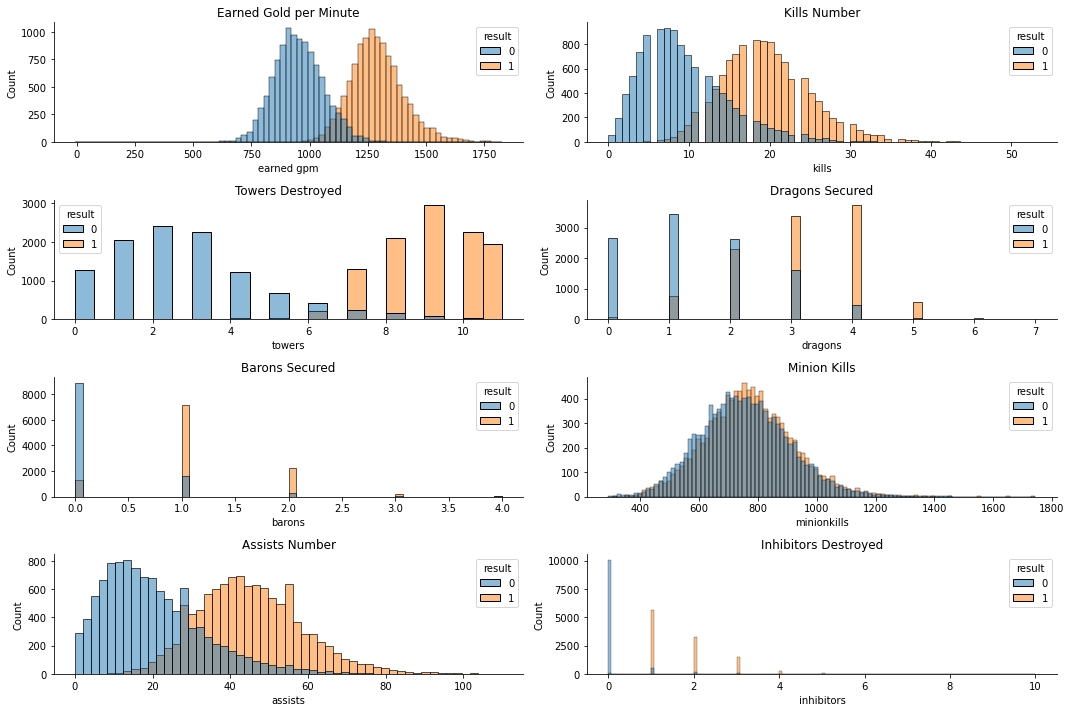

In [27]:
# subplot 4 rows x 2 columns
plt.subplots(4,2, figsize=(15,10))

# first subplot
plt.subplot(4,2,1)
sns.histplot(data=lol_cleaned, x=lol_cleaned['earned gpm'], hue=lol_cleaned['result'])
plt.title('Earned Gold per Minute')

# second subplot
plt.subplot(4,2,2)
sns.histplot(data=lol_cleaned, x=lol_cleaned['kills'], hue=lol_cleaned['result'])
plt.title('Kills Number')

# third subplot
plt.subplot(4,2,3)
sns.histplot(data=lol_cleaned, x=lol_cleaned['towers'], hue=lol_cleaned['result'])
plt.title('Towers Destroyed')

# fourth subplot
plt.subplot(4,2,4)
sns.histplot(data=lol_cleaned, x=lol_cleaned['dragons'], hue=lol_cleaned['result'])
plt.title('Dragons Secured')

# fifth subplot
plt.subplot(4,2,5)
sns.histplot(data=lol_cleaned, x=lol_cleaned['barons'], hue=lol_cleaned['result'])
plt.title('Barons Secured')

# sixth subplot
plt.subplot(4,2,6)
sns.histplot(data=lol_cleaned, x=lol_cleaned['minionkills'], hue=lol_cleaned['result'])
plt.title('Minion Kills')

# seventh subplot
plt.subplot(4,2,7)
sns.histplot(data=lol_cleaned, x=lol_cleaned['assists'], hue=lol_cleaned['result'])
plt.title('Assists Number')

# eigthth subplot
plt.subplot(4,2,8)
sns.histplot(data=lol_cleaned, x=lol_cleaned['inhibitors'], hue=lol_cleaned['result'])
plt.title('Inhibitors Destroyed')

plt.tight_layout()
sns.despine()
plt.show()

It is apparent from above that the winning team achieved more objectives through the game. Two factors allow each team to grow stronger at the beginning of each game, the gold earned and the experience acquired by each player. In the first three minutes, the direct way to earn more of one of those factors is by "farming" which means killing your opponents or minions. It is extremely difficult to kill your opponent without the assistance of your teammates in the early stages. Teamwork is reflected in the assist column. The 'Assists Number' plot shows that the winning team has higher values than the losing team. During the early stages of the game, teamwork is essential, which would allow teams to achieve more objectives and thereby earn more gold.

Let's now evaluate the interaction between our independent variables through a correlation matrix and see which of them have a strong association.

In [28]:
# Correlation between independent variables
features_cleaned = lol_cleaned.drop(columns=['side', 'team', 'date', 'result']).corr()

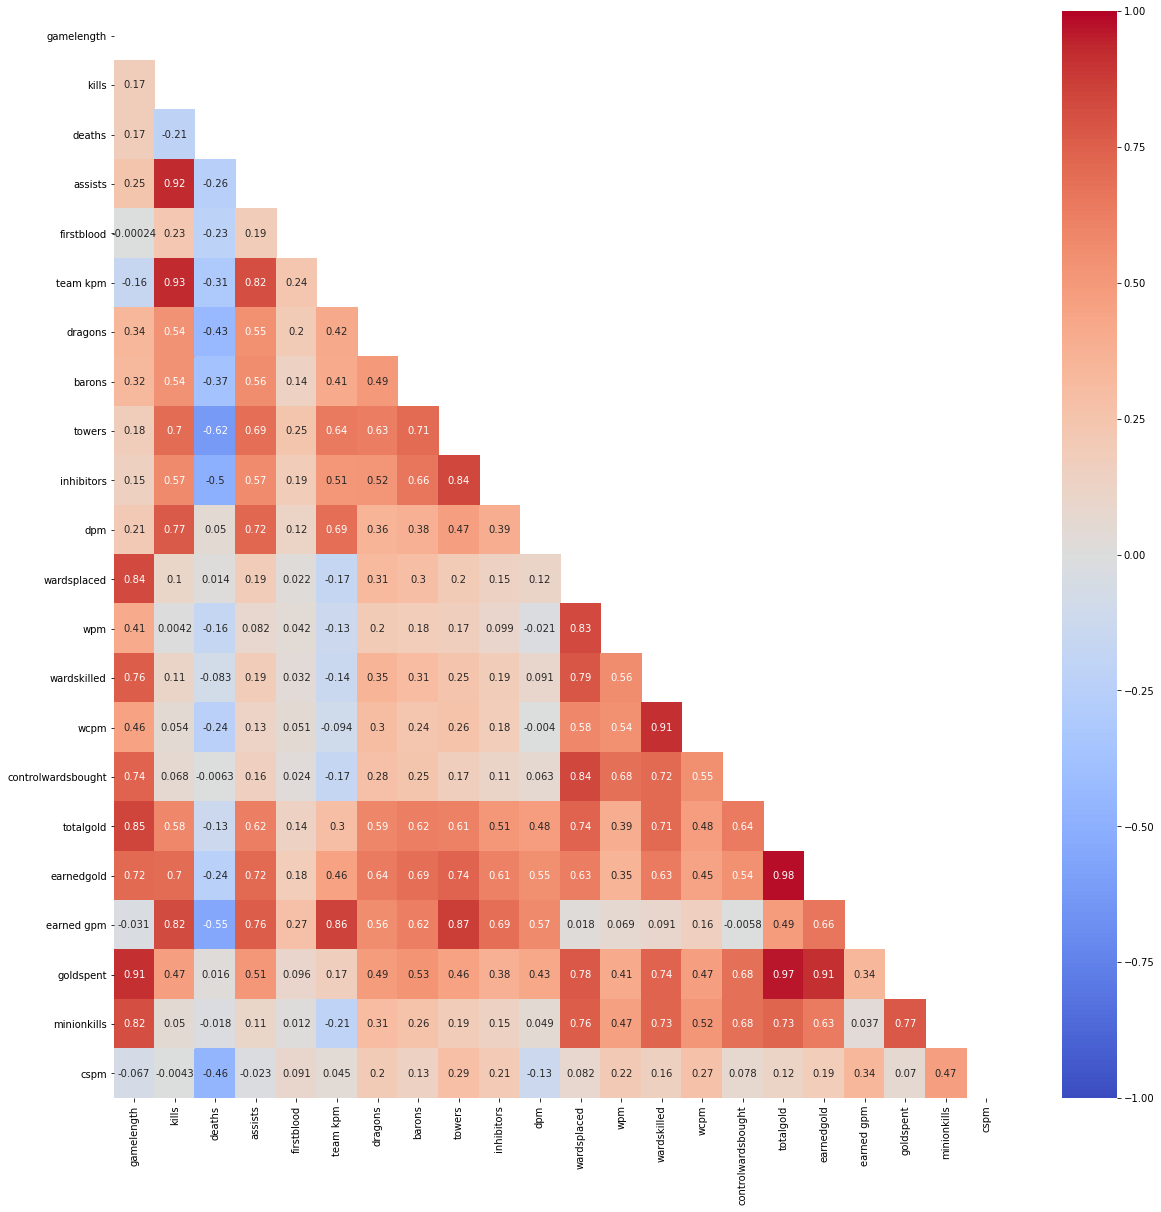

In [29]:
# Correlation of the variables in a heatmap
plt.figure(figsize=(20,20))
mask = np.triu(np.ones_like(features_cleaned, dtype=bool))
sns.heatmap(features_cleaned, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)
plt.show()

According to the correlation matrix, some of our features are highly correlated with each other, indicating collinearity. We will remove those features that present a significant correlation in our model in order to avoid multicollinearity.

There ares some features that are inderect measures from others, like:
- `totalgold`: The inderect measures are `earned gpm`, `goldspent`, `earnedgold`.
- `kills`: The inderect measures are `team kpm`, `dpm`, `assists`.
- `controlwardsbought`: The inderect measures are `wpm`, `wardskilled`, `wardsplaced`.
- `towers`: The indirect measure is `inhibitors`

We will remove the indirect measures and recheck the correlation matrix.

In [30]:
# Correlation between independent variables
features_cleaned = lol_cleaned.drop(columns=['side', 'team', 'date', 'result', 'earned gpm', 'goldspent', 
                                             'team kpm', 'dpm', 'wpm', 'wardskilled', 'earnedgold',
                                             'wardsplaced', 'gamelength','inhibitors', 'assists']).corr()

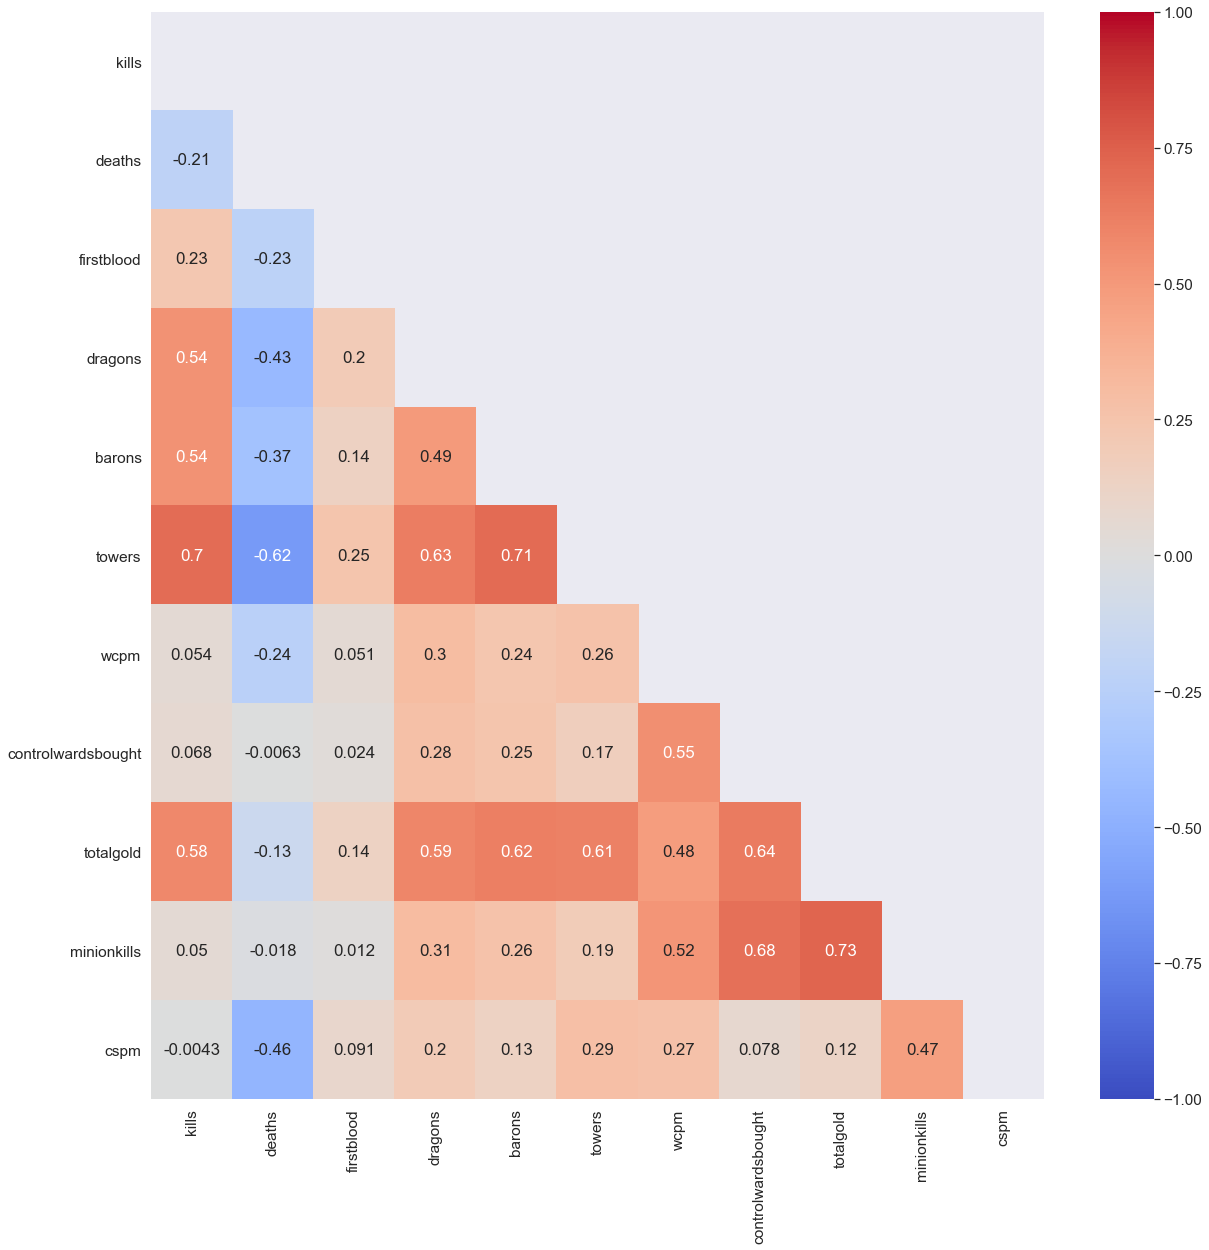

In [31]:
# set font size for the heatmap
sns.set(font_scale=1.4)

# Correlation of the variables in a heatmap
plt.figure(figsize=(20,20))
mask = np.triu(np.ones_like(features_cleaned, dtype=bool))
sns.heatmap(features_cleaned, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)
plt.show()

We still have some high associations with some features after removing indirect measures, such as:
- `totalgold` with `minionskills`: The more minionkills, the more money the team will earn.
- `towers` with other objectives: Towers are the main defenses of each team. When a tower is destroyed, the team that destroyed it earns money, and the team that loses it becomes defenseless.

All of these features will remain. Also, we will keep `gamelength` and `date` in order to generate some new features in the modeling part.

In [32]:
# drop indirect measures
lol_cleaned = lol_cleaned.drop(columns = ['earned gpm', 'goldspent', 'team kpm', 'dpm', 'wpm', 'wardskilled',
                                          'earnedgold', 'wardsplaced', 'inhibitors', 'assists'])

In [33]:
# check first rows from the dataset
lol_cleaned.head()

,gameid,date,side,team,gamelength,result,kills,deaths,firstblood,dragons,barons,towers,wcpm,controlwardsbought,totalgold,minionkills,cspm
46,6909-9183,2021-01-09 09:22:04,Blue,Top Esports,2050,0,3,9,1.0,2.0,0.0,3.0,2.4293,40.0,54617,987.0,36.0000
47,6909-9183,2021-01-09 09:22:04,Red,Suning,2050,1,9,3,0.0,2.0,1.0,6.0,1.7854,46.0,60520,947.0,35.5610
58,6909-9184,2021-01-09 10:16:20,Blue,Top Esports,2241,0,16,27,0.0,3.0,2.0,6.0,1.9545,42.0,69692,957.0,33.2798
59,6909-9184,2021-01-09 10:16:20,Red,Suning,2241,1,27,17,1.0,2.0,0.0,7.0,1.4726,49.0,70269,939.0,31.8876
70,6910-9189,2021-01-09 11:30:25,Blue,Oh My God,1887,0,4,15,1.0,1.0,0.0,3.0,1.4944,32.0,51145,848.0,33.8951


In [34]:
# dataset shape
lol_cleaned.shape

(21652, 17)

As a result of cleaning and exploring the data set, we ended up with 21652 rows and 17 columns. We can now save the cleaned data set to a CSV file.

In [35]:
lol_cleaned.to_csv('data\lol_cleaned.csv')

## Conclusion

Here we perform the dataset cleaning, which involves filtering out the information we need to build our model, handling duplicates and missing values, and determining the column types. We also defined a data dictionary that explains the content of each column. After we have finished those procedures, we analyze the data and choose the features that will make up our model.
Next, we will build our model and evaluate it.